## Observations and Insights 

1) While the gender split throughout the study as a whole was fairly even, when it came to the split for individual drug regimens the ratio was nearly 2:1 in some cases. To avoid the potential confounding effect of this imbalance care should be taken in the future to evenly divide male and female mice between the regimens.
2) Capomulin and Ramicane seem to be the most successful treatments. Nearly all the mice saw a reduction in tumor volume with some seeing up to a 50% reduction!
3) There is a strong coorelation (r = 0.8419) between mouse weight and average tumor size. Further analysis needs to be done to see if this had an effect on our results. For example, did the studies with Capomulin and Ramicane have, on average, smaller mice? Efforts should be made in the future to ensure that mouse weight is evenly distributed amoungst the cohorts.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = complete_df["Mouse ID"].nunique()
print(num_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#column index references
TIMEPOINT = 1
MOUSE_ID = 0
#df of just the 2 columns we want to look at
dupe_hunt_df = complete_df[["Mouse ID", "Timepoint"]]
#dict for keeping track of values we've seen and list for tracking confirmed duplicates
mouse_dict = {}
dupe_id = []
#loop over our new df adding unique values to our dict and duplicate IDs to our list
for i in range(len(dupe_hunt_df)):
    if dupe_hunt_df.iloc[i,MOUSE_ID] not in mouse_dict:
        mouse_dict[dupe_hunt_df.iloc[i,MOUSE_ID]] = []
    if dupe_hunt_df.iloc[i,TIMEPOINT] in mouse_dict[dupe_hunt_df.iloc[i,MOUSE_ID]]:
        dupe_id.append(dupe_hunt_df.iloc[i,MOUSE_ID])
    else:
        mouse_dict[dupe_hunt_df.iloc[i,MOUSE_ID]].append(dupe_hunt_df.iloc[i,TIMEPOINT])

print(dupe_id)

['g989', 'g989', 'g989', 'g989', 'g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_data_df = complete_df.loc[complete_df["Mouse ID"].isin(dupe_id),:]
dupe_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_df[~complete_df["Mouse ID"].isin(dupe_id)]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df["Mouse ID"].nunique()
print(num_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#group by regimen
summary_group = clean_df.groupby("Drug Regimen")
#aggregate Tumor volume on desired metrics
summary_df = summary_group.agg({"Tumor Volume (mm3)": ['mean', 'median','var','std','sem']})
#label columns
summary_df.columns = ["Volume Mean","Median Volume","Volume Variance","Volume SD", "SEM"]
summary_df


,Volume Mean,Median Volume,Volume Variance,Volume SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

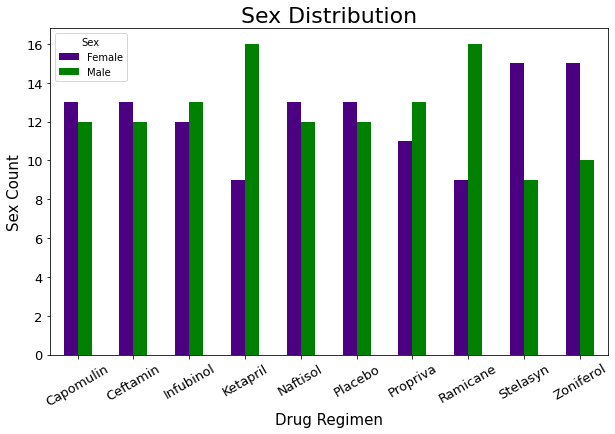

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
sex_group = clean_df.groupby(["Drug Regimen","Sex"])
sex_chart_df = sex_group["Mouse ID"].nunique().unstack()
#create and format plot
ax = sex_chart_df.plot.bar(figsize = (10,6), fontsize = 13, color = ["indigo","green"], rot = 30)
ax.set_title("Sex Distribution", fontsize = 22)
ax.set_ylabel("Sex Count", fontsize = 15)
ax.set_xlabel("Drug Regimen", fontsize = 15)

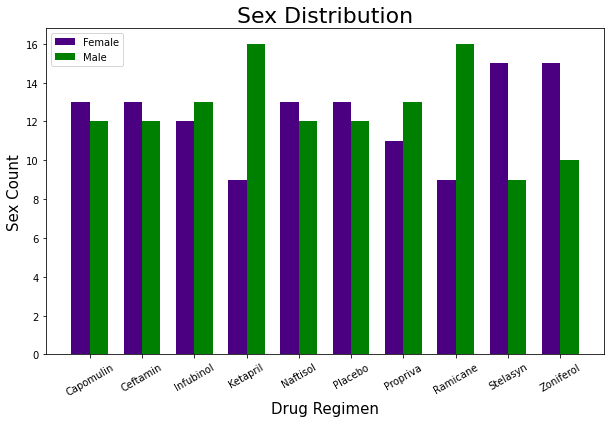

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_labels = sex_chart_df.index
y_axis = {
    "Male" : sex_chart_df["Male"].values,
    "Female": sex_chart_df["Female"].values
}
# bar width and x position for each bar
width = 0.35
x_pos = np.arange(len(y_axis["Male"]))

fig, ax = plt.subplots(figsize = (10,6))
#place Male bars one 'width' away from Female bars
plt.bar(x_pos, y_axis["Female"], width, label = "Female", color = "indigo")
plt.bar(x_pos + width, y_axis["Male"], width, label = "Male", color = "green")
#plot formatting
plt.xticks(x_pos + width / 2, x_labels, rotation = 30)
plt.title("Sex Distribution", fontsize = 22)
plt.ylabel("Sex Count", fontsize = 15)
plt.xlabel("Drug Regimen", fontsize = 15)
plt.legend(loc="best")
plt.show()

Text(0, 0.5, 'Sex Count')

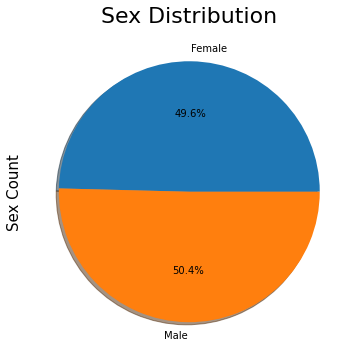

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ax = sex_chart_df.sum().plot.pie(figsize = (10,6), shadow = True, autopct="%1.1f%%")
ax.set_title("Sex Distribution", fontsize = 22)
ax.set_ylabel("Sex Count", fontsize = 15)

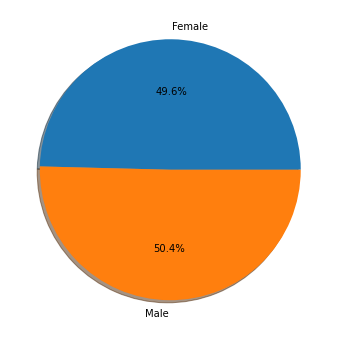

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_chart_df.columns
wedges = [sex_chart_df["Female"].sum(),sex_chart_df["Male"].sum()]

fig, ax = plt.subplots(figsize = (10,6))
plt.pie(wedges, labels = labels, autopct='%1.1f%%', shadow = True)
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs_df = complete_df.loc[complete_df["Drug Regimen"].isin(regimens_list),:]

# Start by getting the last (greatest) timepoint for each mouse
max_time_mouse_df = drugs_df.groupby("Mouse ID", as_index=False)["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volumes_df = clean_df.merge(max_time_mouse_df, how = "inner", on=['Mouse ID','Timepoint'])
final_volumes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [13]:
# Calculate the quartiles and IQR and quantitatively determine
# if there are any potential outliers across all four treatment regimens

# Get a data frame of just volumes and their associated Regimen
all_volumes = final_volumes_df[["Drug Regimen","Tumor Volume (mm3)"]]
# Make a dict with a key for each of our regimens and a value of an empty dict
regimens_dict = {"Capomulin": {}, "Ramicane": {}, "Infubinol": {}, "Ceftamin": {}}

# loop through all four regimens, extracting quartile, IQR and bounds data,
# finally look for outliers in the data for that regimen
for regimen in regimens_dict:
    # get a series of tumor volumes for just our current regimen
    current_regimen_data = all_volumes.loc[all_volumes["Drug Regimen"] == regimen,"Tumor Volume (mm3)"]
    # calculate quartiles and add to dictionary
    regimens_dict[regimen]["quartiles"] = current_regimen_data.quantile([.25,.5,.75])
    # calculate iqr and add to dictionary
    regimens_dict[regimen]["iqr"] = regimens_dict[regimen]["quartiles"][0.75] - regimens_dict[regimen]["quartiles"][0.25]
    # calculate bounds and add to dictionary
    regimens_dict[regimen]["lower bound"] = regimens_dict[regimen]["quartiles"][0.25] - (1.5*regimens_dict[regimen]["iqr"])
    regimens_dict[regimen]["upper bound"] = regimens_dict[regimen]["quartiles"][0.75] + (1.5*regimens_dict[regimen]["iqr"])
    # find outliers
    # make a list in our dict to hold potential outliers
    regimens_dict[regimen]["potential outliers"] = []
    for volume in current_regimen_data:
        # if a volume falls outside the bounds, add it to the potential_outliers list
        if volume > regimens_dict[regimen]["upper bound"] or volume < regimens_dict[regimen]["lower bound"]:
            regimens_dict[regimen]["potential outliers"].append(volume)
    # print what we find.
    print(f"There are {len(regimens_dict[regimen]['potential outliers'])} potential outliers in the data set for {regimen}.")
    if regimens_dict[regimen]["potential outliers"]:
        print("They are as follows:")
        for outlier in regimens_dict[regimen]["potential outliers"]:
            print(outlier)
    print("")

There are 0 potential outliers in the data set for Capomulin.

There are 0 potential outliers in the data set for Ramicane.

There are 1 potential outliers in the data set for Infubinol.
They are as follows:
36.321345799999996

There are 0 potential outliers in the data set for Ceftamin.



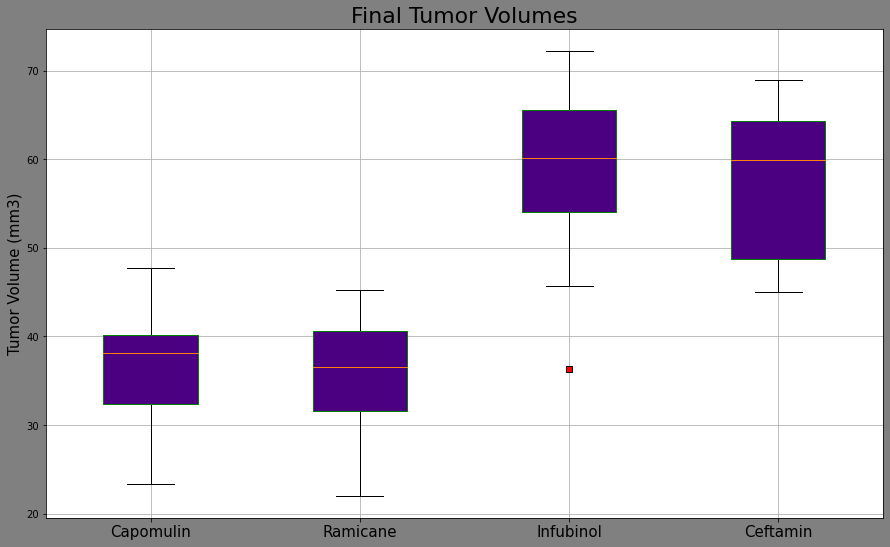

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(figsize = (15,9))
# List comprehension: Creating a list of volume data lists from my dictionary above.
data_sets = [all_volumes.loc[all_volumes["Drug Regimen"] == list(regimens_dict.keys())[i],"Tumor Volume (mm3)"] for i in range(len(regimens_dict.keys()))]
# create plot and format
ax.boxplot(data_sets,
           patch_artist = True,
           boxprops = {"facecolor" : "indigo", "color" : "green"},
           flierprops = {"markerfacecolor": "r", "marker" : 's'})
ax.set_title("Final Tumor Volumes", fontsize = 22)
ax.set_ylabel("Tumor Volume (mm3)", fontsize = 15)
ax.set_xticklabels(list(regimens_dict.keys()), fontsize = 15)
ax.grid(True)
ax.set_facecolor = '.6'
fig.patch.set_facecolor('.5')

plt.show()

## Line and Scatter Plots

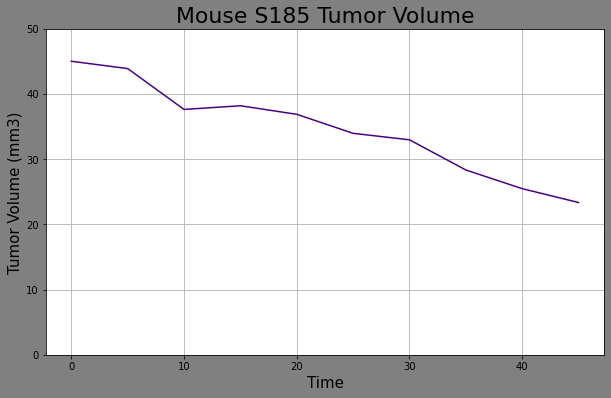

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#get just the Capomulin mice
plot_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
#get just the first mouse and then only the tumor volume and timepoint data
mouse_id = plot_data.iloc[0,0]
plot_data = plot_data.loc[plot_data["Mouse ID"] == mouse_id,:][["Tumor Volume (mm3)", "Timepoint"]]
#set index to timepoint
plot_data = plot_data.set_index("Timepoint")
#create and format plot
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(plot_data, color = "indigo")
ax.grid(True)
ax.set_ylim(0,50)
ax.set_title(f"Mouse {mouse_id.upper()} Tumor Volume", fontsize = 22)
ax.set_xlabel("Time", fontsize = 15)
ax.set_ylabel("Tumor Volume (mm3)", fontsize = 15)
fig.patch.set_facecolor('.5')
plt.show()

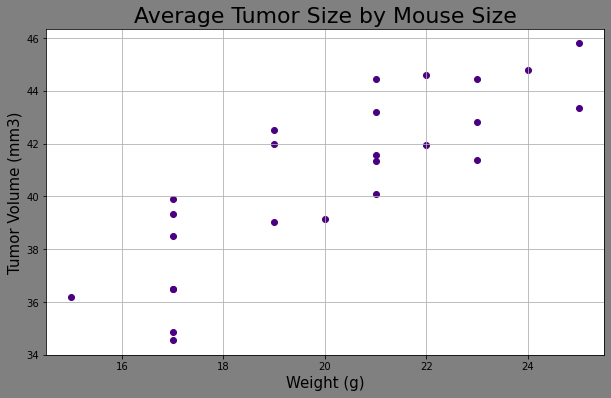

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# get a dataframe of just Capomulin data and the columns we need
weight_volume_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:][["Mouse ID", "Tumor Volume (mm3)","Weight (g)"]]
# group by mouse ID and get average
weight_volume_df = weight_volume_df.groupby("Mouse ID").mean()
# extract our 2 axis values
x_values = weight_volume_df["Weight (g)"]
y_values = weight_volume_df["Tumor Volume (mm3)"]
#create and format plot
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x_values, y_values, color = "indigo")
ax.grid(True)
ax.set_title(f"Average Tumor Size by Mouse Size", fontsize = 22)
ax.set_xlabel("Weight (g)", fontsize = 15)
ax.set_ylabel("Tumor Volume (mm3)", fontsize = 15)
fig.patch.set_facecolor('.5')
plt.show()

## Correlation and Regression

The correlation coefficient is 0.8419
The coefficient of determination (r^2) is 0.7089


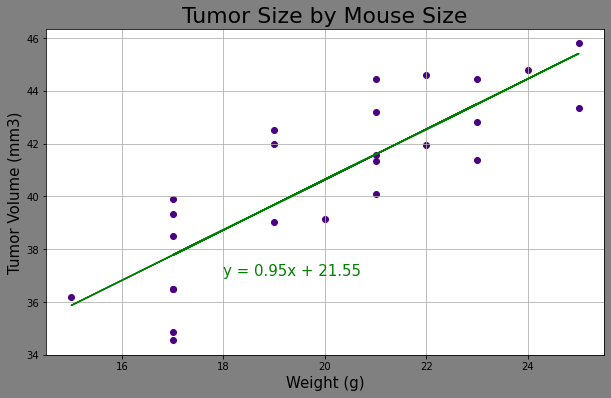

In [20]:
# Calculate the correlation coefficient and linear regression model between
# mouse weight and average tumor volume for the Capomulin treatment. 
# Plot the linear regression model on top of the previous scatter plot.
#use scipy to get linear regression function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#get the y values for my line
regress_values = x_values * slope + intercept
#get equation for annotation.
line_eq = f"y = {slope.round(2)}x + {intercept.round(2)}"
#print correlation values
print(f"The correlation coefficient is {rvalue.round(4)}")
print(f"The coefficient of determination (r^2) is {(rvalue**2).round(4)}")
#create and format plot
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x_values, y_values, color = "indigo")
ax.plot(x_values, regress_values, color = "g")
ax.annotate(line_eq, (18,37), fontsize = 15, color = "g")
ax.grid(True)
ax.set_title(f"Tumor Size by Mouse Size", fontsize = 22)
ax.set_xlabel("Weight (g)", fontsize = 15)
ax.set_ylabel("Tumor Volume (mm3)", fontsize = 15)
fig.patch.set_facecolor('.5')
plt.show()